<a href="https://colab.research.google.com/github/anish2105/Natural-Language-Processing-NLP-Basics/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series with LSTM**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('monthly_milk_production.csv',index_col = 'Date' , parse_dates = True)
df.index.freq = 'MS'

In [4]:
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


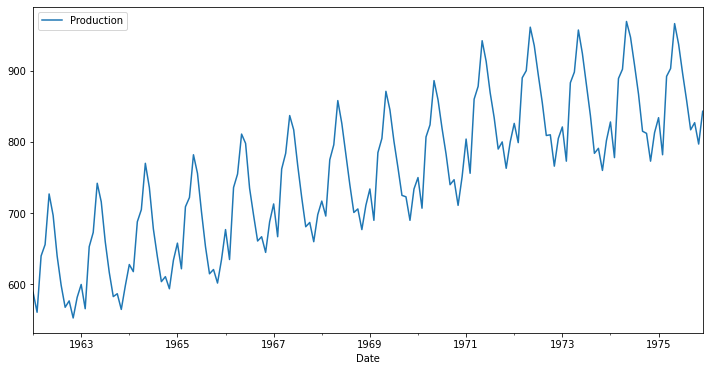

In [5]:
df.plot(figsize = (12,6))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

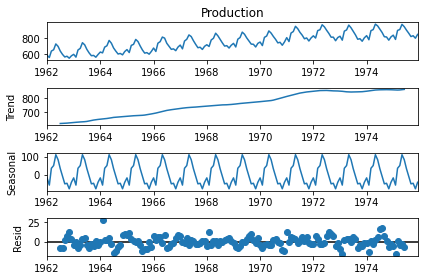

In [7]:
results = seasonal_decompose(df['Production'])
results.plot();

In [8]:
len(df)

168

In [9]:
train = df.iloc[:156]
test = df.iloc[156:]

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [15]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [16]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [17]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
# define generator
n_input = 3 #picking 3 bacthes at a time to predict the next batch
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [20]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [21]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense , LSTM

In [24]:
model  = Sequential()
model.add(LSTM(100, activation = 'relu' , input_shape = (n_input , n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam' , loss = 'mse')

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(generator , epochs = 50)

Epoch 1/50
144/144 [==============================] - 3s 8ms/step - loss: 0.0476
Epoch 2/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0209
Epoch 3/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0190
Epoch 4/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0108
Epoch 5/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0065
Epoch 6/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0055
Epoch 7/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0051
Epoch 8/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0051
Epoch 9/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0077
Epoch 10/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0049
Epoch 11/50
144/144 [==============================] - 2s 15ms/step - loss: 0.0047
Epoch 12/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0053
Epoch 13/50
144/144 [==

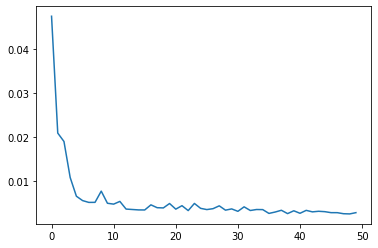

In [27]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

**Make Predictions with LSTM**

In [28]:
last_train_batch = scaled_train[-12:]

In [30]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [31]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 313ms/step


array([[0.6011675]], dtype=float32)

In [32]:
scaled_test[0]

array([0.67548077])

In [33]:
test_predictions = []

first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 55ms/step


In [34]:
test_predictions

[array([0.6011675], dtype=float32),
 array([0.60951537], dtype=float32),
 array([0.7590424], dtype=float32),
 array([0.84042454], dtype=float32),
 array([0.9349948], dtype=float32),
 array([0.90951025], dtype=float32),
 array([0.8303006], dtype=float32),
 array([0.7198497], dtype=float32),
 array([0.62767917], dtype=float32),
 array([0.5851291], dtype=float32),
 array([0.55239964], dtype=float32),
 array([0.56848127], dtype=float32)]

In [35]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [36]:
true_predictions = scaler.inverse_transform(test_predictions)

In [37]:
test['Predictions'] = true_predictions

<ipython-input-37-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


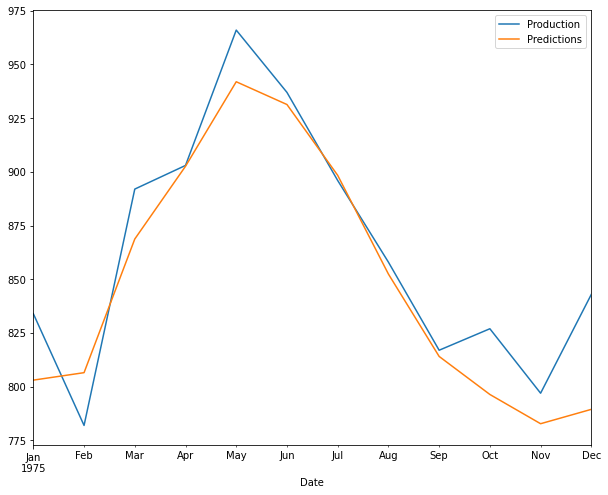

In [38]:
test.plot(figsize=(10,8))

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

23.724827125410613
